# Predicting Particulate Matter (PM2.5) Concentrations in the Air of China

## Exploring Shenyang Data

In [33]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Dara preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split
#from sklearn.cross_validation import train_test_split

# Pretty display for notebooks
%matplotlib inline

import os
print(os.listdir("../China/China_dataset"))

# Load Guangzhou dataset
dataset_Shenyang = pd.read_csv('../China/China_dataset/Shenyang.csv', parse_dates={'date' : ['year', 'month', 'day']})

display(dataset_Shenyang.head(n=3))
display(dataset_Shenyang.info())

dataset_Shenyang['year'] = dataset_Shenyang['date'].dt.year   
dataset_Shenyang['month'] = dataset_Shenyang['date'].dt.month
dataset_Shenyang['day'] = dataset_Shenyang['date'].dt.strftime('%w').astype(int)
print(dataset_Shenyang["day"].value_counts())
# day_type: 1 if the day weekend, 0 if the day weekday
dataset_Shenyang['day_Type'] = dataset_Shenyang['day'].apply(lambda x: 'Weekends' if x >= 5 else 'Weekdays').astype('category')

dataset_Shenyang = dataset_Shenyang.drop('date', axis=1)

# Success - Display the first five records
display(dataset_Shenyang.head(n=3))
display(dataset_Shenyang.info())

# Total number of records
n_records = len(dataset_Shenyang["PM_US Post"])

# Print the results
print("Total number of records: {}".format(n_records))

['Beijing.csv', 'Chengdu.csv', 'Guangzhou.csv', 'Shanghai.csv', 'Shenyang.csv']


,date,No,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,new_wind
0,2010-01-01,1,0,4,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN,1.0289
1,2010-01-01,2,1,4,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN,1.5433
2,2010-01-01,3,2,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN,2.5722


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 16 columns):
date             52584 non-null datetime64[ns]
No               52584 non-null int64
hour             52584 non-null int64
season           52584 non-null int64
PM_Taiyuanjie    24388 non-null float64
PM_US Post       21680 non-null float64
PM_Xiaoheyan     24627 non-null float64
DEWP             51892 non-null float64
HUMI             51904 non-null float64
PRES             51892 non-null float64
TEMP             51892 non-null float64
cbwd             51892 non-null object
Iws              51892 non-null float64
precipitation    39821 non-null float64
Iprec            39821 non-null float64
new_wind         51892 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(3), object(1)
memory usage: 6.4+ MB


None

6    7512
5    7512
4    7512
3    7512
2    7512
1    7512
0    7512
Name: day, dtype: int64


,No,hour,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,new_wind,year,month,day,day_Type
0,1,0,4,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN,1.0289,2010,1,5,Weekends
1,2,1,4,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN,1.5433,2010,1,5,Weekends
2,3,2,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN,2.5722,2010,1,5,Weekends


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 19 columns):
No               52584 non-null int64
hour             52584 non-null int64
season           52584 non-null int64
PM_Taiyuanjie    24388 non-null float64
PM_US Post       21680 non-null float64
PM_Xiaoheyan     24627 non-null float64
DEWP             51892 non-null float64
HUMI             51904 non-null float64
PRES             51892 non-null float64
TEMP             51892 non-null float64
cbwd             51892 non-null object
Iws              51892 non-null float64
precipitation    39821 non-null float64
Iprec            39821 non-null float64
new_wind         51892 non-null float64
year             52584 non-null int64
month            52584 non-null int64
day              52584 non-null int64
day_Type         52584 non-null category
dtypes: category(1), float64(11), int64(6), object(1)
memory usage: 7.3+ MB


None

Total number of records: 52584


## Assessing Shenyang Data

- Precipitation, Iprec columns have zeros values --> it seems fine
- Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan
- Convert Season to categorical 
- Year ? 
- Fix Hour values
- Remove records before 2013
- Add a city column
- Fix outliers in columns: PM_US Post, HUMI, TEMP, Iws, DEWP, precipitation, Iprec
- Remove missing values
- Convert Numerical to categorical data

## Cleaning Shenyang Data

In [34]:
# First make copies for cleaning
dataset_Shenyang_clean = dataset_Shenyang.copy()

In [35]:
#Drop columns: row, 'PM_Caotangsi', 'PM_Shahepu'
Unneeded_Columns = ['No', 'PM_Taiyuanjie',  'PM_Xiaoheyan' , 'Iprec', 'Iws']
dataset_Shenyang_clean = dataset_Shenyang_clean.drop(Unneeded_Columns, axis = 1)
display(dataset_Shenyang_clean.head(n=2))
display(dataset_Shenyang_clean.describe())


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
0,0,4,NaN,-26.0,69.79,1024.0,-22.0,NE,NaN,1.0289,2010,1,5,Weekends
1,1,4,NaN,-26.0,76.26,1024.0,-23.0,NE,NaN,1.5433,2010,1,5,Weekends


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,52584.000000,52584.000000,21680.00000,51892.000000,51904.000000,51892.000000,51892.000000,39821.000000,51892.000000,52584.000000,52584.000000,52584.000000
mean,11.500000,2.491100,75.83750,0.850304,63.006561,1016.005492,8.460495,0.083895,3.004036,2012.499772,6.523962,3.000000
std,6.922252,1.116988,68.99593,14.261483,21.883355,9.724308,13.948303,0.717721,1.831534,1.707485,3.448452,2.000019
min,0.000000,1.000000,1.00000,-97.000000,0.000000,988.000000,-28.000000,0.000000,0.000000,2010.000000,1.000000,0.000000
25%,5.750000,1.000000,31.00000,-11.000000,46.260000,1008.000000,-3.000000,0.000000,2.000000,2011.000000,4.000000,1.000000
50%,11.500000,2.000000,57.00000,1.000000,64.720000,1016.000000,10.000000,0.000000,3.000000,2012.000000,7.000000,3.000000
75%,17.250000,3.000000,97.00000,14.000000,82.010000,1024.000000,21.000000,0.000000,4.000000,2014.000000,10.000000,5.000000
max,23.000000,4.000000,932.00000,28.000000,100.000000,1043.000000,35.000000,33.100000,15.000000,2015.000000,12.000000,6.000000


In [36]:
# Remove records before 2013
dataset_Shenyang_clean = dataset_Shenyang_clean.drop(dataset_Shenyang_clean[dataset_Shenyang_clean.year < 2013].index)

print("Total number of records after removing years before 2013: ", len(dataset_Shenyang_clean))


print('The statistical summary of air quality data in Shenyang')
display(np.round(dataset_Shenyang_clean.describe(), 3))

print('The information summary of air quality data in Shenyang')
display(dataset_Shenyang_clean.info())


Total number of records after removing years before 2013:  26280
The statistical summary of air quality data in Shenyang


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,26280.000,26280.000,21680.000,26276.000,26276.000,26276.000,26276.000,24803.000,26276.000,26280.000,26280.000,26280.000
mean,11.500,2.490,75.838,1.067,61.479,1015.899,9.139,0.061,3.050,2014.000,6.526,3.000
std,6.922,1.117,68.996,13.818,22.141,9.815,13.616,0.616,1.843,0.817,3.448,1.998
min,0.000,1.000,1.000,-32.000,7.860,988.000,-27.000,0.000,0.000,2013.000,1.000,0.000
25%,5.750,1.000,31.000,-11.000,44.200,1008.000,-2.000,0.000,2.000,2013.000,4.000,1.000
50%,11.500,2.000,57.000,1.000,62.630,1016.000,11.000,0.000,3.000,2014.000,7.000,3.000
75%,17.250,3.000,97.000,14.000,79.890,1024.000,21.000,0.000,4.000,2015.000,10.000,5.000
max,23.000,4.000,932.000,28.000,100.000,1042.000,35.000,23.900,14.000,2015.000,12.000,6.000


The information summary of air quality data in Shenyang
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26280 entries, 26304 to 52583
Data columns (total 14 columns):
hour             26280 non-null int64
season           26280 non-null int64
PM_US Post       21680 non-null float64
DEWP             26276 non-null float64
HUMI             26276 non-null float64
PRES             26276 non-null float64
TEMP             26276 non-null float64
cbwd             26276 non-null object
precipitation    24803 non-null float64
new_wind         26276 non-null float64
year             26280 non-null int64
month            26280 non-null int64
day              26280 non-null int64
day_Type         26280 non-null category
dtypes: category(1), float64(7), int64(5), object(1)
memory usage: 2.8+ MB


None

In [37]:
dataset_Shenyang_clean = dataset_Shenyang_clean[pd.notnull(dataset_Shenyang_clean['PM_US Post'])]
print("Total number of records after removing missing values in PM 2.5: ", len(dataset_Shenyang_clean))


Total number of records after removing missing values in PM 2.5:  21680


In [38]:
# Convert Season to categorical
dataset_Shenyang_clean.season = dataset_Shenyang_clean.season.astype('category')
dataset_Shenyang_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21680 entries, 28981 to 52583
Data columns (total 14 columns):
hour             21680 non-null int64
season           21680 non-null category
PM_US Post       21680 non-null float64
DEWP             21679 non-null float64
HUMI             21679 non-null float64
PRES             21679 non-null float64
TEMP             21679 non-null float64
cbwd             21679 non-null object
precipitation    20453 non-null float64
new_wind         21679 non-null float64
year             21680 non-null int64
month            21680 non-null int64
day              21680 non-null int64
day_Type         21680 non-null category
dtypes: category(2), float64(7), int64(4), object(1)
memory usage: 2.2+ MB


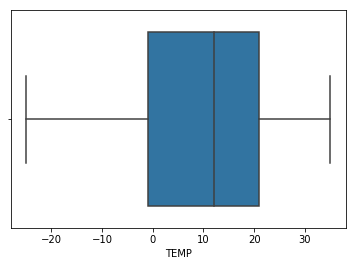

In [39]:
# Fix outliers in columns: HUMI, TEMP, Iws and DEWP
# In statistics, an outlier is an observation point that is distant from other observations.
# Discover outliers with visualization tools
import seaborn as sns
sns.boxplot(x=dataset_Shenyang_clean['TEMP'])


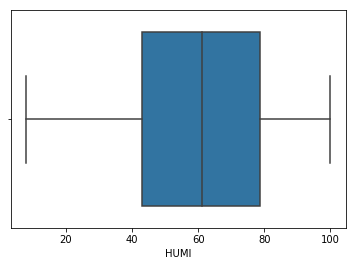

In [40]:
sns.boxplot(x=dataset_Shenyang_clean['HUMI'])


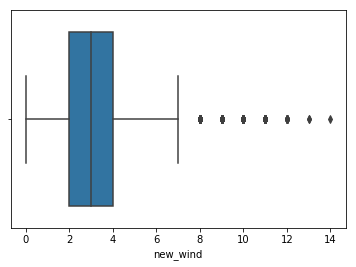

In [41]:
sns.boxplot(x=dataset_Shenyang_clean['new_wind'])


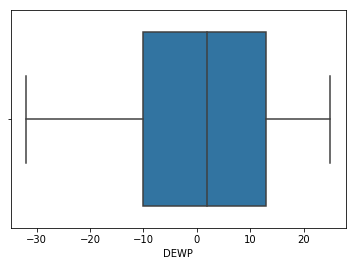

In [42]:
sns.boxplot(x=dataset_Shenyang_clean['DEWP'])

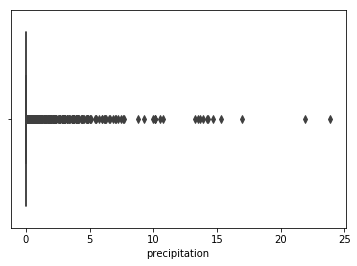

In [43]:
sns.boxplot(x=dataset_Shenyang_clean['precipitation'])

In [44]:
#sns.boxplot(x=dataset_Chengdu_clean['Iprec'])

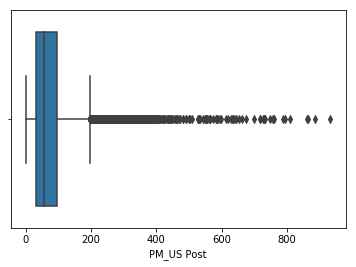

In [45]:
sns.boxplot(x=dataset_Shenyang_clean['PM_US Post'])

In [46]:
Q1 = dataset_Shenyang_clean.quantile(0.25)
Q3 = dataset_Shenyang_clean.quantile(0.75)
IQR = Q3 - Q1
L = IQR + Q3

print(IQR)
print('--')
print(L)

hour             13.00
PM_US Post       66.00
DEWP             23.00
HUMI             35.87
PRES             15.00
TEMP             22.00
precipitation     0.00
new_wind          2.00
year              1.00
month             6.00
day               4.00
dtype: float64
--
hour               31.00
PM_US Post        163.00
DEWP               36.00
HUMI              114.64
PRES             1038.00
TEMP               43.00
precipitation       0.00
new_wind            6.00
year             2016.00
month              16.00
day                 9.00
dtype: float64


In [47]:
# Check wind speed 
(dataset_Shenyang_clean[dataset_Shenyang_clean.new_wind > 7])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
28981,13,1,113.0,-1.0,25.89,1013.0,19.0,SW,0.0,10.0,2013,4,1,Weekdays
29004,12,1,78.0,-3.0,26.98,1010.0,16.0,SW,0.0,8.0,2013,4,2,Weekdays
29035,19,1,21.0,-2.0,33.05,1007.0,14.0,SW,0.0,9.0,2013,4,3,Weekdays
29053,13,1,15.0,3.0,61.76,1006.0,10.0,NW,0.0,9.0,2013,4,4,Weekdays
29145,9,1,16.0,5.0,58.29,1005.0,13.0,SW,0.0,8.0,2013,4,1,Weekdays
29146,10,1,11.0,0.0,38.26,1005.0,14.0,SW,0.0,11.0,2013,4,1,Weekdays
29147,11,1,18.0,0.0,35.87,1005.0,15.0,SW,0.0,9.0,2013,4,1,Weekdays
29148,12,1,21.0,-1.0,33.35,1006.0,15.0,NW,0.0,8.0,2013,4,1,Weekdays
29149,13,1,27.0,-1.0,35.57,1006.0,14.0,NW,0.0,11.0,2013,4,1,Weekdays
29150,14,1,27.0,-2.0,30.98,1006.0,15.0,NW,0.0,11.0,2013,4,1,Weekdays


In [48]:
(dataset_Shenyang_clean[dataset_Shenyang_clean['PM_US Post'] > 200]).sort_values(by = 'PM_US Post', ascending=False)


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type
45001,1,4,932.0,-14.0,84.99,1031.0,-12.0,cv,0.0,1.0,2015,2,4,Weekdays
45005,5,4,886.0,-15.0,92.09,1031.0,-14.0,NE,0.0,4.0,2015,2,4,Weekdays
51303,15,3,864.0,-3.0,86.26,1023.0,-1.0,NW,NaN,3.0,2015,11,0,Weekdays
51302,14,3,862.0,-4.0,74.41,1022.0,0.0,NW,NaN,3.0,2015,11,0,Weekdays
51304,16,3,810.0,-2.0,100.00,1023.0,-2.0,NW,NaN,3.0,2015,11,0,Weekdays
51301,13,3,794.0,-3.0,80.19,1022.0,0.0,NW,NaN,2.0,2015,11,0,Weekdays
51305,17,3,787.0,-2.0,92.91,1023.0,-1.0,NW,NaN,3.0,2015,11,0,Weekdays
51306,18,3,759.0,-2.0,92.91,1023.0,-1.0,NW,NaN,2.0,2015,11,0,Weekdays
45004,4,4,756.0,-15.0,92.09,1031.0,-14.0,NE,0.0,2.0,2015,2,4,Weekdays
51300,12,3,756.0,-4.0,74.41,1022.0,0.0,NW,NaN,3.0,2015,11,0,Weekdays


In [49]:
(dataset_Shenyang_clean[dataset_Shenyang_clean['precipitation'] > 30])


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type


In [50]:
# Removing PM_US Post Outliers 
dataset_Shenyang_clean = dataset_Shenyang_clean.drop(dataset_Shenyang_clean[dataset_Shenyang_clean['precipitation'] > 50].index)


In [51]:

print("dataset_Beijing_clean lenght after removing outliers: ", len(dataset_Shenyang_clean))
dataset_Shenyang_clean.describe()

dataset_Beijing_clean lenght after removing outliers:  21680


,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,day
count,21680.000000,21680.00000,21679.000000,21679.000000,21679.000000,21679.000000,20453.000000,21679.000000,21680.000000,21680.000000,21680.000000
mean,11.489899,75.83750,1.268232,60.364631,1016.010148,9.698833,0.056192,3.052493,2014.116467,6.985793,3.002491
std,6.932988,68.99593,13.113908,22.365395,9.618068,12.958610,0.544550,1.842721,0.774165,3.414259,1.997575
min,0.000000,1.00000,-32.000000,7.860000,988.000000,-25.000000,0.000000,0.000000,2013.000000,1.000000,0.000000
25%,5.000000,31.00000,-10.000000,42.900000,1008.000000,-1.000000,0.000000,2.000000,2014.000000,4.000000,1.000000
50%,11.000000,57.00000,2.000000,61.260000,1016.000000,12.000000,0.000000,3.000000,2014.000000,7.000000,3.000000
75%,18.000000,97.00000,13.000000,78.770000,1023.000000,21.000000,0.000000,4.000000,2015.000000,10.000000,5.000000
max,23.000000,932.00000,25.000000,100.000000,1042.000000,35.000000,23.900000,14.000000,2015.000000,12.000000,6.000000


In [52]:
# drop rows with missing values
dataset_Shenyang_clean = dataset_Shenyang_clean.dropna(axis=0, how="any")
print("dataset_Chengdu_clean lenght after removing missing values: ", len(dataset_Shenyang_clean))


dataset_Chengdu_clean lenght after removing missing values:  20452


In [53]:
# Convert month and hour Features to Cyclical Features
dataset_Shenyang_clean['hour_sin'] = np.sin(dataset_Shenyang_clean.hour*(2.*np.pi/24))
dataset_Shenyang_clean['hour_cos'] = np.cos(dataset_Shenyang_clean.hour*(2.*np.pi/24))
dataset_Shenyang_clean['month_sin'] = np.sin((dataset_Shenyang_clean.month-1)*(2.*np.pi/12))
dataset_Shenyang_clean['month_cos'] = np.cos((dataset_Shenyang_clean.month-1)*(2.*np.pi/12))
dataset_Shenyang_clean['day_sin'] = np.sin(dataset_Shenyang_clean.day*(2.*np.pi/7))
dataset_Shenyang_clean['day_cos'] = np.cos(dataset_Shenyang_clean.day*(2.*np.pi/7))

# Drop the original features : season, month, day and hour 
#Unneeded_Columns = ['month', 'hour', 'day']
#dataset_Shenyang_clean = dataset_Shenyang_clean.drop(Unneeded_Columns, axis = 1)
display(dataset_Shenyang_clean.head(n=1))


,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,precipitation,new_wind,year,month,day,day_Type,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos
28981,13,1,113.0,-1.0,25.89,1013.0,19.0,SW,0.0,10.0,2013,4,1,Weekdays,-0.258819,-0.965926,1.0,6.123234e-17,0.781831,0.62349


In [54]:
# One-hot encode the data using pandas.get_dummies() to convert the non-numeric feature to numeric feature
#dataset_Beijing_clean.month = dataset_Beijing_clean.month.astype('category')
dataset_Shenyang_clean = pd.get_dummies(dataset_Shenyang_clean)


In [55]:
# Rename day type columns 
dataset_Shenyang_clean.rename(columns={"day_Type_Weekdays": "Weekdays", "day_Type_Weekends": "Weekends"}, inplace=True)


In [56]:
dataset_Shenyang_clean.head()

,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,...,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,Weekdays,Weekends
28981,13,113.0,-1.0,25.89,1013.0,19.0,0.0,10.0,2013,4,...,0,0,0,0,0,0,1,0,1,0
29001,9,74.0,-6.0,26.11,1012.0,13.0,0.0,7.0,2013,4,...,0,0,0,0,0,0,1,0,1,0
29002,10,59.0,-5.0,26.40,1012.0,14.0,0.0,5.0,2013,4,...,0,0,0,0,0,0,1,0,1,0
29003,11,69.0,-4.0,26.69,1011.0,15.0,0.0,6.0,2013,4,...,0,0,0,0,0,0,1,0,1,0
29004,12,78.0,-3.0,26.98,1010.0,16.0,0.0,8.0,2013,4,...,0,0,0,0,0,0,1,0,1,0


In [57]:
dataset_Shenyang_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20452 entries, 28981 to 52583
Data columns (total 28 columns):
hour             20452 non-null int64
PM_US Post       20452 non-null float64
DEWP             20452 non-null float64
HUMI             20452 non-null float64
PRES             20452 non-null float64
TEMP             20452 non-null float64
precipitation    20452 non-null float64
new_wind         20452 non-null float64
year             20452 non-null int64
month            20452 non-null int64
day              20452 non-null int64
hour_sin         20452 non-null float64
hour_cos         20452 non-null float64
month_sin        20452 non-null float64
month_cos        20452 non-null float64
day_sin          20452 non-null float64
day_cos          20452 non-null float64
season_1         20452 non-null uint8
season_2         20452 non-null uint8
season_3         20452 non-null uint8
season_4         20452 non-null uint8
cbwd_NE          20452 non-null uint8
cbwd_NW          20452 no

In [58]:
dataset_Shenyang_clean.describe()

,hour,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,year,month,...,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv,Weekdays,Weekends
count,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,...,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000,20452.000000
mean,11.488070,75.075592,0.953354,60.209080,1016.151623,9.399570,0.056195,3.063466,2014.098915,6.920008,...,0.220076,0.298064,0.236652,0.152846,0.181596,0.242226,0.347692,0.075641,0.713475,0.286525
std,6.933015,65.961129,13.059572,22.292088,9.575884,12.960619,0.544563,1.852193,0.782957,3.445498,...,0.414308,0.457419,0.425037,0.359847,0.385521,0.428441,0.476249,0.264429,0.452148,0.452148
min,0.000000,1.000000,-32.000000,7.860000,988.000000,-25.000000,0.000000,0.000000,2013.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,31.000000,-10.000000,42.710000,1009.000000,-1.000000,0.000000,2.000000,2013.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,56.000000,2.000000,61.120000,1016.000000,11.000000,0.000000,3.000000,2014.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,18.000000,97.000000,13.000000,78.390000,1024.000000,20.000000,0.000000,4.000000,2015.000000,10.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,23.000000,932.000000,25.000000,100.000000,1042.000000,35.000000,23.900000,14.000000,2015.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Total number of records
n_records = len(dataset_Shenyang_clean["PM_US Post"])
# Print the results
print("Total number of records: {}".format(n_records))

Total number of records: 20452


Check List
- Precipitation, Iprec columns have zeros values --> it seems fine
- Drop columns: row, PM_Dongsi, PM_Dongsihuan, PM_Nongzhanguan -> done
- Convert Season to categorical -> done
- Year : continuous  
- Fix Month values: Cyclical Features -> done
- Fix Hour values : Cyclical Features -> done 
- Fix day values : Cyclical Features? -> Drop this column 
- Remove records before 2013 -> done
- Add a city column
- Fix outliers in columns: -> done

    * PM_US Post -> remove outlier (values more than 300)
    * HUMI -> Fine range values
    * TEMP -> Fine range values
    * Iws (meters per second) -> http://www.whiteweather.com/wd/vind/Windspeed.htm -> remove outlier (values more than 35)
    * DEWP -> Fine range values
    * precipitation -> remove outlier (values more than 50)
    
- Remove missing values -> done
- Convert Numerical to categorical data -> done

## Storing clean data

In [60]:
# Store the clean DataFrame(s) in a CSV file with name twitter_archive_master.csv
dataset_Shenyang_clean.to_csv('dataset_Shenyang_clean.csv')


## Factors Correlation 

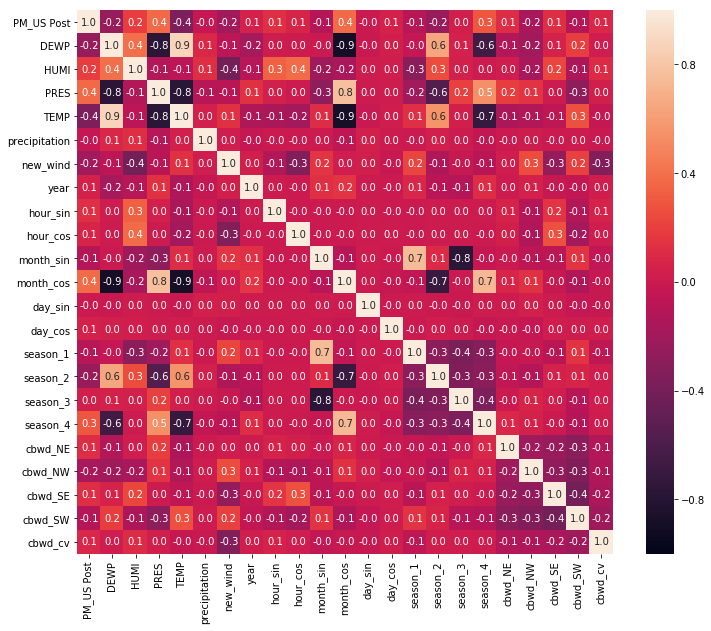

In [27]:
import seaborn as sns
corr = dataset_Shenyang_clean.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1,ax=ax, annot=True, fmt='.1f')

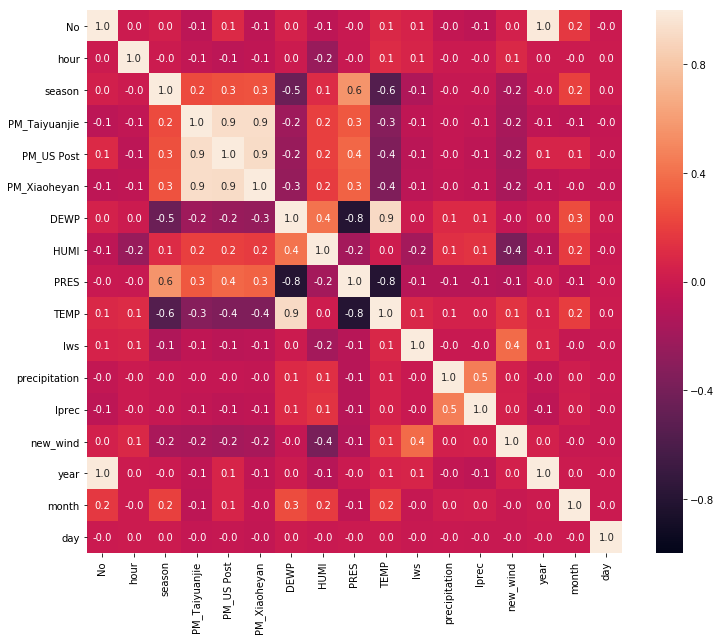

In [28]:
import seaborn as sns
corr = dataset_Shenyang.corr()
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1,ax=ax, annot=True, fmt='.1f')

# Implementation 

In [26]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Dara preprocessing
from sklearn.preprocessing import MinMaxScaler

# Import train_test_split
from sklearn.cross_validation import train_test_split


In [27]:
# Load Shenyang dataset
Shenyang = pd.read_csv('dataset_Shenyang_clean.csv')
Shenyang = Shenyang.drop('Unnamed: 0', axis = 1)

# Success - Display the first five records
display(Shenyang.head(n=3))

# Total number of records
n_records = len(Shenyang["PM_US Post"])
print("Number of records for Shenyang: ", n_records)
print("*********************")

display(Shenyang.info())


,year,day,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,hour_sin,...,month_cos,season_1,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,2013,22,113.0,-1.0,25.89,1013.0,19.0,0.0,10.0,-0.258819,...,6.123234e-17,1,0,0,0,0,0,0,1,0
1,2013,23,74.0,-6.0,26.11,1012.0,13.0,0.0,7.0,0.707107,...,6.123234e-17,1,0,0,0,0,0,0,1,0
2,2013,23,59.0,-5.0,26.40,1012.0,14.0,0.0,5.0,0.500000,...,6.123234e-17,1,0,0,0,0,0,0,1,0


Number of records for Shenyang:  20452
*********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20452 entries, 0 to 20451
Data columns (total 22 columns):
year             20452 non-null int64
day              20452 non-null int64
PM_US Post       20452 non-null float64
DEWP             20452 non-null float64
HUMI             20452 non-null float64
PRES             20452 non-null float64
TEMP             20452 non-null float64
precipitation    20452 non-null float64
new_wind         20452 non-null float64
hour_sin         20452 non-null float64
hour_cos         20452 non-null float64
month_sin        20452 non-null float64
month_cos        20452 non-null float64
season_1         20452 non-null int64
season_2         20452 non-null int64
season_3         20452 non-null int64
season_4         20452 non-null int64
cbwd_NE          20452 non-null int64
cbwd_NW          20452 non-null int64
cbwd_SE          20452 non-null int64
cbwd_SW          20452 non-null int64
cbwd_cv   

None

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


def applyCV(name,estimator):
    # Construct the pipeline with a standard scaler and a small neural network
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append((name, estimator))
    model = Pipeline(estimators)

    # Split the data into features and target label

    features = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'new_wind', 'precipitation', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_SW', 'cbwd_cv', 'season_1', 'season_2', 'season_3', 'season_4', 'year']
    #features = ['HUMI', 'PRES', 'TEMP', 'Iws', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
    X = Shenyang[features].values
    y = Shenyang['PM_US Post']

    # We'll use 5-fold cross validation. That is, a random 80% of the data will be used
    # to train the model, and the prediction score will be computed on the remaining 20%.
    # This process is repeated five times such that the training sets in each "fold"
    # are mutually orthogonal.
    kfold = KFold(n_splits=5,  shuffle=True)

    print(estimators)

    print("**cross_val_score + KFold **")

    results_R2 = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    print('CV Scoring Result: r2 : mean=',np.mean(results_R2),'std=',np.std(results_R2))
    #print(results_R2) 
    print("**************")
    
    results_MAE = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_absolute_error')
    print('CV Scoring Result: MAE : mean=',np.mean(results_MAE),'std=',np.std(results_MAE))
    #print(results_MAE)  
    print("**************")

    results_MSE = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print('CV Scoring Result: MSE : mean=',np.mean(results_MSE),'std=',np.std(results_MSE))
    #print(results_MSE) 
    
    print("***********************************")

    print("**cross_validate**")
    
    scores = cross_validate(model, X, y, scoring=('r2'), cv = 5)
    print('CV Scoring Result: r2 : mean=',np.mean(scores['test_score']))
    #print(scores)  
    print("**************")

    scores = cross_validate(model, X, y, scoring=('neg_mean_absolute_error'), cv = 5)
    print('CV Scoring Result: MAE : mean=',np.mean(scores['test_score']))
    #print(scores)  
    print("**************")

    scores = cross_validate(model, X, y, scoring=('neg_mean_squared_error'), cv = 5)
    print('CV Scoring Result: MSE : mean=',np.mean(scores['test_score']))
    #print(scores) 
    print("-----------------------------------------------")

    
applyCV("LR",LinearRegression())
print("*******************************************")
applyCV("RF",RandomForestRegressor(n_estimators = 96))
print("*******************************************")
applyCV("ANN",MLPRegressor(hidden_layer_sizes= (128, 256)))
print("*******************************************")
applyCV("SVR",SVR(kernel='rbf'))


[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]
**cross_val_score + KFold **
CV Scoring Result: r2 : mean= 0.30130455373072784 std= 0.010310403357491556
**************
CV Scoring Result: MAE : mean= -25.015514729836482 std= 0.29246648391273034
**************
CV Scoring Result: MSE : mean= -995.8686750201456 std= 21.353013055853207
***********************************
**cross_validate**
CV Scoring Result: r2 : mean= 0.20956156737685516
**************
CV Scoring Result: MAE : mean= -26.36391254703625
**************
CV Scoring Result: MSE : mean= -1073.803098404804
-----------------------------------------------
*******************************************
[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impu

In [28]:
#Unneeded_Columns = ['precipitation', 'Iprec']
#dataset_Beijing_clean = dataset_Beijing_clean.drop(Unneeded_Columns, axis = 1)
display(Shenyang.head(n=1))


,year,day,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,new_wind,hour_sin,...,month_cos,season_1,season_2,season_3,season_4,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_SW,cbwd_cv
0,2013,22,113.0,-1.0,25.89,1013.0,19.0,0.0,10.0,-0.258819,...,6.123234e-17,1,0,0,0,0,0,0,1,0


In [29]:

features_ = ['DEWP', 'HUMI', 'PRES', 'TEMP', 'new_wind', 'precipitation',  'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'season_1', 'season_2', 'season_3', 'season_4', 'year']
#features = ['HUMI', 'PRES', 'TEMP', 'Iws', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
Features = Shenyang[features_].values
Target = Shenyang['PM_US Post']


# Saving feature names for later use
feature_list = list(Shenyang[features_])

display(Shenyang[features_].head(n=2))
display(Target.head(n=2))

,DEWP,HUMI,PRES,TEMP,new_wind,precipitation,hour_sin,hour_cos,month_sin,month_cos,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,season_1,season_2,season_3,season_4,year
0,-1.0,25.89,1013.0,19.0,10.0,0.0,-0.258819,-0.965926,1.0,6.123234e-17,0,0,0,0,1,0,0,0,2013
1,-6.0,26.11,1012.0,13.0,7.0,0.0,0.707107,-0.707107,1.0,6.123234e-17,0,0,0,0,1,0,0,0,2013


0    113.0
1     74.0
Name: PM_US Post, dtype: float64

In [30]:
#Shuffle and Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.33, random_state=0)

In [31]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression

Linear_regression = LinearRegression()
start_Training_time = int(time() * 1000)
Linear_regression.fit(X_train, y_train)
end_Training_time = int(time() * 1000)

print( "Linear Regression: " )
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))


predict = Linear_regression.predict(X_test)

r2 = r2_score(y_test, predict)
MSE =  mean_squared_error(y_test,predict)

print('Testing: ')
print ('Testing r2_score: ', round(r2, 5))
print('Testing MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predict)
print('MAE_score: ', round(MAE, 5))

# Calculate the absolute errors
errors = abs(predict - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Linear Regression: 
Training: 
Training took 10 ms
Testing: 
Testing r2_score:  0.2902
Testing MSE_score:  3099.39986
MAE_score:  37.51654
Mean Absolute Error: 37.52 degrees.
Accuracy: 5.02 %.


In [33]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 96)

start_Training_time = int(time() * 1000)
rf.fit(X_train, y_train) 
end_Training_time = int(time() * 1000)

print('Random Forest Regressor: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))


start_Testing_time = int(time() * 1000)
predictions = rf.predict(X_test)
end_Testing_time = int(time() * 1000)

print('Testing: ')
print('Testing took {} ms'.format(end_Testing_time - start_Testing_time))
print('r2_score: ', round(r2_score(y_test,predictions),5))
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', round(MAE, 5))


# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Random Forest Regressor: 
Training: 
Training took 5989 ms
Testing: 
Testing took 185 ms
r2_score:  0.6275
MSE_score:  1626.53699
MAE_score:  25.66066
Mean Absolute Error: 25.66 degrees.
Accuracy: 38.21 %.


In [34]:
rf1 = RandomForestRegressor(n_estimators = 96)

# Feature Scaling
#Sc_X1 = StandardScaler()
#CorrelatedFeaturesScaled = Sc_X1.fit_transform(Features)

from sklearn.model_selection import cross_validate
scores = cross_validate(rf1, Features, Target, scoring=('r2'), cv = 5)
print(scores)  

{'fit_time': array([7.78418684, 6.90276408, 6.82841825, 6.46797967, 6.13096023]), 'score_time': array([0.06501198, 0.07164478, 0.118294  , 0.06646919, 0.08230972]), 'test_score': array([-0.10311907,  0.20606015,  0.18957746,  0.21863011,  0.14541043]), 'train_score': array([0.95487876, 0.95603104, 0.95655263, 0.95692522, 0.95338401])}


In [35]:
# Saving feature names for later use
#feature_list = list(Features.columns)


# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: HUMI                 Importance: 0.19
Variable: month_cos            Importance: 0.15
Variable: PRES                 Importance: 0.13
Variable: DEWP                 Importance: 0.09
Variable: TEMP                 Importance: 0.08
Variable: new_wind             Importance: 0.06
Variable: hour_sin             Importance: 0.06
Variable: hour_cos             Importance: 0.06
Variable: cbwd_NW              Importance: 0.04
Variable: year                 Importance: 0.04
Variable: month_sin            Importance: 0.03
Variable: cbwd_NE              Importance: 0.03
Variable: cbwd_SE              Importance: 0.02
Variable: precipitation        Importance: 0.01
Variable: cbwd_cv              Importance: 0.01
Variable: season_1             Importance: 0.01
Variable: season_3             Importance: 0.01
Variable: season_2             Importance: 0.0
Variable: season_4             Importance: 0.0


In [36]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

mlp = MLPRegressor(hidden_layer_sizes= (128, 256))
start_Training_time = int(time() * 1000)
mlp.fit(X_train,y_train)
end_Training_time = int(time() * 1000)

print('Neural Network / MLPRegressor: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))

predictions = mlp.predict(X_test)

print('Testing: ')
r2 = r2_score(y_test,predictions)
print('r2_score: ', r2)
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', MSE)
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', MAE)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Neural Network / MLPRegressor: 
Training: 
Training took 12417 ms
Testing: 
r2_score:  0.5152453788377598
MSE_score:  2116.7239531606133
MAE_score:  29.709023328393926
Mean Absolute Error: 29.71 degrees.
Accuracy: 31.25 %.


In [37]:
from sklearn.svm import SVR

clf = SVR(kernel='rbf')
start_Training_time = int(time() * 1000)
clf.fit(X_train, y_train) 
end_Training_time = int(time() * 1000)

print('Support Vector Regression: ')
print('Training: ')
print('Training took {} ms'.format(end_Training_time - start_Training_time))

start_Testing_time = int(time() * 1000)
predictions = clf.predict(X_test)
end_Testing_time = int(time() * 1000)

print('Testing: ')
print('Testing took {} ms'.format(end_Testing_time - start_Testing_time))
print('r2_score: ', round(r2_score(y_test,predictions),5))
MSE =  mean_squared_error(y_test,predictions)
print('MSE_score: ', round(MSE,5))
MAE =  mean_absolute_error(y_test,predictions)
print('MAE_score: ', MAE)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Support Vector Regression: 
Training: 
Training took 8250 ms
Testing: 
Testing took 3179 ms
r2_score:  0.30119
MSE_score:  3051.43545
MAE_score:  33.34084440882515
Mean Absolute Error: 33.34 degrees.
Accuracy: 30.43 %.
